In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("final_zillow.csv", dtype = str, header = 1)
df.head()

,Street Address,City,County,State,Country,Zipcode,Ziilow Id,Property Url,Bedrooms,Bathrooms,...,Listing Type,Agent Name,Agent Phone Number,Agent Email,Agent License Number,Agency,MLS ID,MLS Name,HOA Fee,Pictures
0,829 W 66th St,Los Angeles,Los Angeles County,CA,USA,90044,20934009,https://www.zillow.com/homedetails/829-W-66th-...,3,1,...,Unknown Listed By,Lillie Reda,323-747-3640,lilliec1@att.net,DRE #01084559,Excellence Real Estate,DW22007910,CRMLS,NaN,https://photos.zillowstatic.com/fp/a0f5b38d972...
1,9673 Via Torino #154,Burbank,Los Angeles County,CA,USA,91504,20033668,https://www.zillow.com/homedetails/9673-Via-To...,2,2,...,For Rent,NaN,NaN,jerry@teamrockproperties.com,NaN,NaN,NaN,Zillow Rental Manager,$439 monthly,https://photos.zillowstatic.com/fp/22c59ef7419...
2,9673 Via Torino,Burbank,Los Angeles County,CA,USA,91504,2088531295,https://www.zillow.com/homedetails/9673-Via-To...,2,1.5,...,Unknown Listed By,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://photos.zillowstatic.com/fp/c960fd9b761...
3,13621 Simshaw Ave,Sylmar,Los Angeles County,CA,USA,91342,20102436,https://www.zillow.com/homedetails/13621-Simsh...,3,2,...,Unknown Listed By,Audrey Overton,NaN,audrey@audreyoverton.com,DRE #02007589,Century 21 Everest,SR22032355,CRMLS,NaN,https://photos.zillowstatic.com/fp/f41d7ed87a0...
4,4600 Don Lorenzo Dr APT 30,Los Angeles,Los Angeles County,CA,USA,90008,61361676,https://www.zillow.com/homedetails/4600-Don-Lo...,2,3,...,Unknown Listed By,Stefanie Mcintyre,818-321-6522,soldbystefanie@kw.com,DRE # 01874509,KW Advisors,22-117173,CLAW,$404 monthly,https://photos.zillowstatic.com/fp/6a763dd674b...


In [5]:
drop_cols = ['Property Url', 'Country', 'Ziilow Id', 'Living Area Unit', 'Cooling', 'Fireplaces', 'Heating',
            'Parking', 'Currency', 'Time On Zillow', 'Latitude', 'Longitude',
            'Listing Type', 'Agent Phone Number', 'Agent Email', 'Agent License Number',
            'MLS ID', 'MLS Name', 'HOA Fee', 'Pictures', 'Street Address']

In [6]:
df = df.drop(drop_cols, axis = 1)

KeyError: "['Property Url' 'Country' 'Ziilow Id' 'Living Area Unit' 'Cooling'\n 'Fireplaces' 'Heating' 'Parking' 'Currency' 'Time On Zillow' 'Latitude'\n 'Longitude' 'Listing Type' 'Agent Phone Number' 'Agent Email'\n 'Agent License Number' 'MLS ID' 'MLS Name' 'HOA Fee' 'Pictures'\n 'Street Address'] not found in axis"

In [7]:
df['Price'] = df['Price'].replace('--', np.nan)

In [8]:
df['Description'] = df['Description'].astype(str)

In [9]:
df = df.drop(5901, axis = 0)

In [10]:
pd.to_numeric(df['Price'])

0        685000
1          3500
2        685000
3        688000
4        700000
          ...  
34392    810000
34393    815000
34394    810000
34395    810000
34396    805000
Name: Price, Length: 34396, dtype: int64

## Basic Feature Extraction

### Word Count

In [11]:
df['word_count'] = df['Description'].apply(lambda x: len(str(x).split(" ")))

In [11]:
df.head()

,City,County,State,Zipcode,Bedrooms,Bathrooms,Property Status,Property Type,Living Area,Zestimate,...,Parking Capacity,Price,Year Built,Description,Days On Zillow,View Count,Favourite Count,Agent Name,Agency,word_count
0,Los Angeles,Los Angeles County,CA,90044,3,1,RECENTLY_SOLD,SINGLE_FAMILY,1044,662700,...,1,685000,1921,Huge Development or Investment Potential!. Thi...,3,31,0,Lillie Reda,Excellence Real Estate,84
1,Burbank,Los Angeles County,CA,91504,2,2,FOR_RENT,TOWNHOUSE,1151,649951,...,2,3500,1975,"Fully remodeled, Corner Unit townhome in the C...",3,359,22,NaN,NaN,146
2,Burbank,Los Angeles County,CA,91504,2,1.5,RECENTLY_SOLD,TOWNHOUSE,1151,887400,...,0,685000,NaN,Cabrini Villas.Top of Hill.Private/Quiet/Grass...,3,9,0,NaN,NaN,86
3,Sylmar,Los Angeles County,CA,91342,3,2,RECENTLY_SOLD,SINGLE_FAMILY,1274,623000,...,4,688000,1959,SOLD BEFORE PROCESSING - Welcome home to this ...,4,23,0,Audrey Overton,Century 21 Everest,73
4,Los Angeles,Los Angeles County,CA,90008,2,3,RECENTLY_SOLD,TOWNHOUSE,1151,664700,...,2,700000,2002,This tri-level end unit is one of Just 55 unit...,4,28,0,Stefanie Mcintyre,KW Advisors,143


### Average Word Length

In [12]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

In [13]:
df['avg_word'] = df['Description'].apply(lambda x: avg_word(x))
df[['Description','avg_word']].head()

,Description,avg_word
0,Huge Development or Investment Potential!. Thi...,4.542169
1,"Fully remodeled, Corner Unit townhome in the C...",4.829932
2,Cabrini Villas.Top of Hill.Private/Quiet/Grass...,6.209302
3,SOLD BEFORE PROCESSING - Welcome home to this ...,4.485714
4,This tri-level end unit is one of Just 55 unit...,5.204225


### Stopwords

In [14]:
import nltk

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['Description'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Description','stopwords']].head()

,Description,stopwords
0,Huge Development or Investment Potential!. Thi...,31
1,"Fully remodeled, Corner Unit townhome in the C...",47
2,Cabrini Villas.Top of Hill.Private/Quiet/Grass...,14
3,SOLD BEFORE PROCESSING - Welcome home to this ...,24
4,This tri-level end unit is one of Just 55 unit...,37


### Special Characters - Exclamation

In [16]:
df['chars'] = df['Description'].apply(lambda x: len([x for x in x.split() if '!' in x]))
df[['Description','chars']].head()

,Description,chars
0,Huge Development or Investment Potential!. Thi...,1
1,"Fully remodeled, Corner Unit townhome in the C...",1
2,Cabrini Villas.Top of Hill.Private/Quiet/Grass...,0
3,SOLD BEFORE PROCESSING - Welcome home to this ...,0
4,This tri-level end unit is one of Just 55 unit...,0


### Numerics

In [18]:
df['numerics'] = df['Description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Description','numerics']].head()

,Description,numerics
0,Huge Development or Investment Potential!. Thi...,2
1,"Fully remodeled, Corner Unit townhome in the C...",4
2,Cabrini Villas.Top of Hill.Private/Quiet/Grass...,2
3,SOLD BEFORE PROCESSING - Welcome home to this ...,2
4,This tri-level end unit is one of Just 55 unit...,2


### Uppercase

In [19]:
df['upper'] = df['Description'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['Description','upper']].head()

,Description,upper
0,Huge Development or Investment Potential!. Thi...,2
1,"Fully remodeled, Corner Unit townhome in the C...",3
2,Cabrini Villas.Top of Hill.Private/Quiet/Grass...,2
3,SOLD BEFORE PROCESSING - Welcome home to this ...,3
4,This tri-level end unit is one of Just 55 unit...,2


## Basic Pre-processing

In [20]:
# Convert to Lowercase
df['description'] = df['Description'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove punctuation
df['description'] = df['description'].str.replace('[^\w\s]','')

### Remove noisy words

In [21]:
# Remove stop words
df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Remove common words
freq1 = pd.Series(' '.join(df['description']).split()).value_counts()[:10]
freq1 = list(freq1.index)
df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))

# Remove rare words
freq2 = pd.Series(' '.join(df['description']).split()).value_counts()[-10:]
freq2 = list(freq2.index)
df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq2))

### Lemmatization

In [22]:
from textblob import Word
from nltk.stem import WordNetLemmatizer

In [26]:
lemmatizer = WordNetLemmatizer()
#' '.join([wnl.lemmatize(words) for words in df['descrip'][0]])
# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in text]

def lemmatize_text(text):
    word_list = nltk.word_tokenize(text)

    # Lemmatize list of words and join
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

df['description'] = df['description'].apply(lemmatize_text)

# Analysis - Price Regression

https://smltar.com/mlregression.html#mlregressionfull

## Train-Test Split

In [68]:
from sklearn.model_selection import train_test_split

In [63]:
X = df['description']
y = df['Price']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

## Count Vectorizer & TF-IDF

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

In [71]:
from sklearn.feature_extraction.text import TfidfTransformer

#### NOTE: Use Cross Validation Instead

In [66]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

## Apply SVR

In [32]:
from sklearn.svm import SVR

In [67]:
regressor = SVR(kernel = 'linear')
regressor.fit(X_train_tfidf, y_train)

SVR(kernel='linear')

In [68]:
regressor.score(X_train_tfidf, y_train)

-0.029431873763067218

In [69]:
regressor.score(X_test_tfidf, y_test)

-0.03861299178774091

## Apply LinearSVR

In [36]:
from sklearn.svm import LinearSVR

In [72]:
regr = LinearSVR(random_state=0, tol=1e-5)
regr.fit(X_train_tfidf, y_train)

LinearSVR(random_state=0, tol=1e-05)

In [73]:
regr.score(X_train_tfidf, y_train)

-0.20779440292072637

In [74]:
regr.score(X_test_tfidf, y_test)

-0.3003279366482223

# Analysis - Agent Gender

In [79]:
import missingno as msno

<AxesSubplot:>

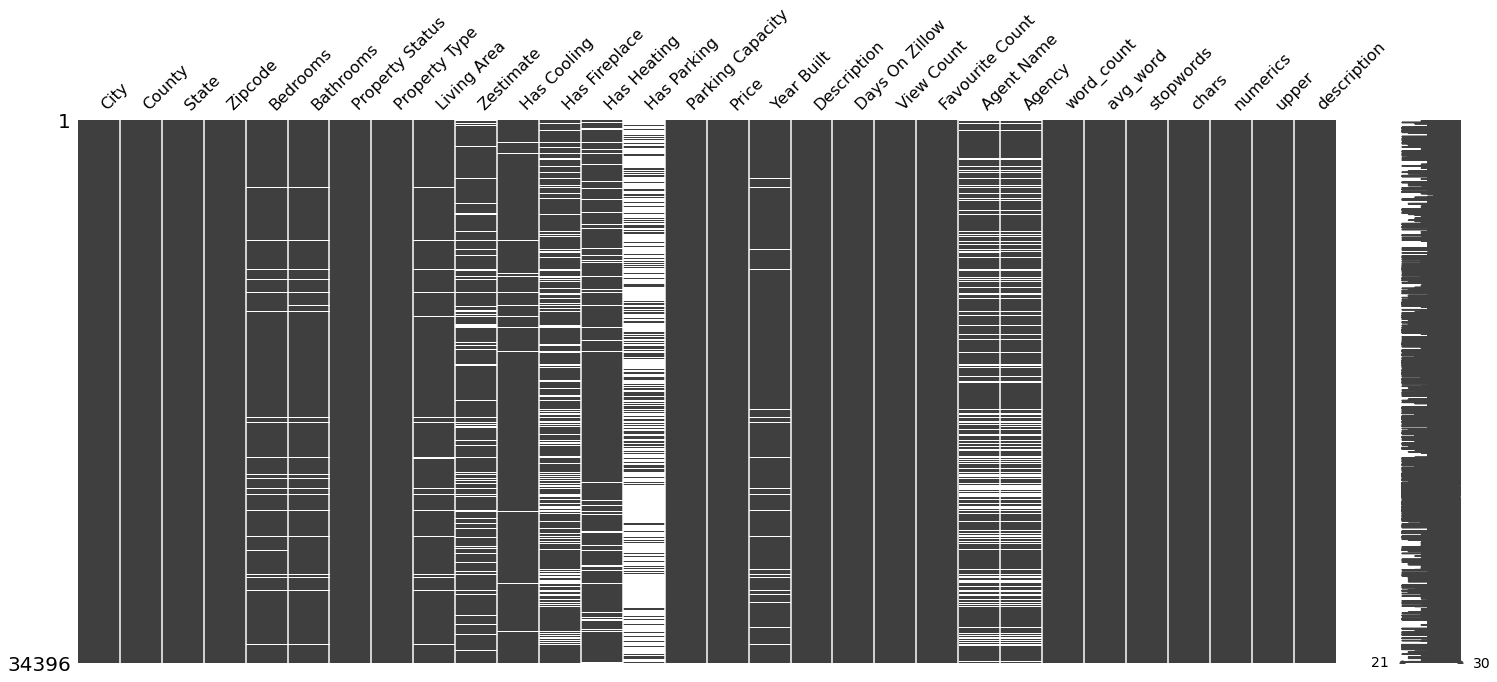

In [85]:
msno.matrix(df)

In [42]:
df1 = df.dropna(subset = ['Agent Name'], axis = 0)

In [37]:
import random
from nltk.corpus import names
import nltk

In [38]:
def gender_features(word):
    return {'last_letter':word[-1]}
  
# preparing a list of examples and corresponding class labels.
labeled_names = ([(name, 'male') for name in names.words('male.txt')]+
             [(name, 'female') for name in names.words('female.txt')])
  
random.shuffle(labeled_names)
  
# we use the feature extractor to process the names data.
featuresets = [(gender_features(n), gender) 
               for (n, gender)in labeled_names]
  
# Divide the resulting list of feature
# sets into a training set and a test set.
train_set, test_set = featuresets[500:], featuresets[:500]
  
# The training set is used to 
# train a new "naive Bayes" classifier.
classifier = nltk.NaiveBayesClassifier.train(train_set)
  
print(classifier.classify(gender_features('mahavir')))
# output should be 'male'

print(nltk.classify.accuracy(classifier, train_set))

male
0.761149919398173


In [55]:
def helper(name):
    return classifier.classify(gender_features(name.split()[0]))

In [56]:
df1['Agent_Gender'] = df1['Agent Name'].apply(helper)

<ipython-input-56-8d1fd34c17cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Agent_Gender'] = df1['Agent Name'].apply(helper)


In [85]:
X = df1['description']
y = df1['Agent_Gender']

In [58]:
from sklearn import preprocessing

In [86]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4)

In [88]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

In [89]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

## Naive Bayes Classifier

In [83]:
from sklearn.naive_bayes import MultinomialNB

In [90]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [91]:
clf.score(X_train_tfidf, y_train)

0.783159188690842

In [92]:
clf.score(X_test_tfidf, y_test)

0.5692818290771642

## Linear SVC

In [78]:
from sklearn.svm import LinearSVC

In [93]:
lsvc = LinearSVC(random_state=0, tol=1e-5)
lsvc.fit(X_train_tfidf, y_train)

LinearSVC(random_state=0, tol=1e-05)

In [94]:
lsvc.score(X_train_tfidf, y_train)

0.8837123540258144

In [95]:
lsvc.score(X_test_tfidf, y_test)

0.5715866138102701

## SVC

In [96]:
from sklearn.svm import SVC

In [97]:
svc = SVC(random_state=0, tol=1e-5)
svc.fit(X_train_tfidf, y_train)

SVC(random_state=0, tol=1e-05)

In [99]:
svc.score(X_train_tfidf, y_train)

0.9632452366318377

In [100]:
svc.score(X_test_tfidf, y_test)

0.5900248916751175